In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
metadata = pd.read_excel("dataset.xls")
metadata.head()

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no


In [3]:
# Identify categorical and numerical columns
categorical_columns = []
numerical_columns = []

for column in metadata.columns:
    if metadata[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Fill missing values with mode for categorical columns
metadata[categorical_columns] = metadata[categorical_columns].fillna(metadata[categorical_columns].mode().iloc[0])

# Fill missing values with mean for numerical columns
metadata[numerical_columns] = metadata[numerical_columns].fillna(metadata[numerical_columns].mean())


In [4]:
metadata

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
1,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,regularly,occasionally to regularly,occasionally,no or occasionally,no,no,no
2,20 and more,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,yes,no,no,occasionally,no or occasionally,no,no,no
3,19,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4,18,female,yes,humanities,second,no,no,yes,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,19,male,yes,humanities,first,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4180,18,male,yes,humanities,first,no,no,no,yes,yes,...,no,no,no,no,no,no,no or occasionally,no,no,no
4181,19,female,yes,humanities,first,no,no,yes,yes,yes,...,no,no,no,no,no,occasionally,no or occasionally,no,no,no
4182,20 and more,male,yes,humanities,first,no,no,no,no,no,...,no,no,no,no,no,occasionally,no or occasionally,no,yes,no


In [5]:
metadata['Age (4 levels)'] = metadata['Age (4 levels)'].astype(str)

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Identify object (categorical) columns
object_columns = metadata.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to object columns
for column in object_columns:
    metadata[column] = label_encoder.fit_transform(metadata[column])

# The object (categorical) columns in the DataFrame are now label encoded


In [7]:
metadata

,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,Professional objective,Informed about opportunities,Satisfied with living conditions,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,2,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,0,0,0,0,0
1,1,0,1,0,1,0,0,1,1,1,...,0,0,0,4,2,1,0,0,0,0
2,2,0,1,0,1,0,0,1,1,1,...,0,0,1,2,1,1,0,0,0,0
3,1,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4,0,0,1,0,1,0,0,1,1,1,...,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,1,1,0,0,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4180,0,1,1,0,0,0,0,0,1,1,...,0,0,0,2,1,0,0,0,0,0
4181,1,0,1,0,0,0,0,1,1,1,...,0,0,0,2,1,1,0,0,0,0
4182,2,1,1,0,0,0,0,0,0,0,...,0,0,0,2,1,1,0,0,1,0


# Feature Forming

For BMI: bmi = weight/height*height

for Mean Arterial Pressure: MAP = DP + 0.412 (SP - DP)
DP = Dystolic Pressure
SP = Systolic Pressure

For Pulse Pressure: PP = SP - DP

In [8]:
'''
Create new df for features which includes 3 features measured from processed features as in paper
'''

features = pd.DataFrame()

features['BMI'] = metadata['Weight (kg)'] / (metadata['Height (cm)'] *  0.01 * 2)

features['MAP'] = metadata['Diastolic blood pressure (mmHg)'] + \
    (0.412 *(metadata['Systolic blood pressure (mmHg)'] - metadata['Diastolic blood pressure (mmHg)']) * \
     metadata['Diastolic blood pressure (mmHg)'] )

features['PP'] = metadata['Systolic blood pressure (mmHg)'] - metadata['Diastolic blood pressure (mmHg)']
features.head()

,BMI,MAP,PP
0,18.787879,19.270205,5.368206
1,16.764706,15.300000,5.000000
2,19.785543,18.536000,4.000000
3,22.020725,17.888000,3.000000
4,12.732919,15.888000,4.000000


In [9]:
# merge all features together
features = features.join(metadata)
features = features.drop(labels=['Weight (kg)',
                                 'Height (cm)',
                                 'Systolic blood pressure (mmHg)',
                                 'Diastolic blood pressure (mmHg)'],axis=1)
features.head()

,BMI,MAP,PP,Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,Difficulty memorizing lessons,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,18.787879,19.270205,5.368206,2,0,1,0,1,0,0,...,0,0,0,2,1,0,0,0,0,0
1,16.764706,15.300000,5.000000,1,0,1,0,1,0,0,...,0,0,0,4,2,1,0,0,0,0
2,19.785543,18.536000,4.000000,2,0,1,0,1,0,0,...,0,0,1,2,1,1,0,0,0,0
3,22.020725,17.888000,3.000000,1,0,1,0,1,0,0,...,0,0,0,2,1,1,0,0,0,0
4,12.732919,15.888000,4.000000,0,0,1,0,1,0,0,...,0,0,0,2,1,0,0,0,0,0


### Normalization

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Specify the columns to be normalized
columns_to_normalize = ['BMI', 'MAP', 'PP', 'Heart rate (bpm)']

# Create a new dataframe with the selected columns
X = features.copy()[columns_to_normalize]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

# Add the remaining non-normalized columns to the new dataframe
remaining_columns = features.drop(columns=columns_to_normalize)
X1 = pd.concat([X, remaining_columns], axis=1)

# The dataframe X now contains the min-max normalized columns along with the other features


In [11]:
X1

,BMI,MAP,PP,Heart rate (bpm),Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,...,Anxiety symptoms,Panic attack symptoms,Depressive symptoms,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,0.256726,0.352963,0.505778,0.416667,2,0,1,0,1,0,...,0,0,0,2,1,0,0,0,0,0
1,0.183151,0.197930,0.468532,0.297619,1,0,1,0,1,0,...,0,0,0,4,2,1,0,0,0,0
2,0.293007,0.324293,0.367376,0.297619,2,0,1,0,1,0,...,0,0,1,2,1,1,0,0,0,0
3,0.374292,0.298989,0.266221,0.357143,1,0,1,0,1,0,...,0,0,0,2,1,1,0,0,0,0
4,0.036531,0.220891,0.367376,0.400590,0,0,1,0,1,0,...,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,0.256604,0.427695,0.367376,0.333333,1,1,1,0,0,0,...,0,0,0,2,1,1,0,0,0,0
4180,0.219993,0.427695,0.367376,0.476190,0,1,1,0,0,0,...,0,0,0,2,1,0,0,0,0,0
4181,0.190409,0.436911,0.468532,0.357143,1,0,1,0,0,0,...,0,0,0,2,1,1,0,0,0,0
4182,0.067474,0.325596,0.393067,0.488095,2,1,1,0,0,0,...,0,0,0,2,1,1,0,0,1,0


In [13]:
depression = X1['Depressive symptoms']
X = X1.drop(['Anxiety symptoms', 'Depressive symptoms', 'Panic attack symptoms'], axis=1)

In [14]:
X

,BMI,MAP,PP,Heart rate (bpm),Age (4 levels),Gender,French nationality,Field of study,Year of university,Learning disabilities,...,Abnormal urinalysis,Vaccination up to date,Control examination needed,Cigarette smoker (5 levels),Cigarette smoker (3 levels),Drinker (3 levels),Drinker (2 levels),Binge drinking,Marijuana use,Other recreational drugs
0,0.256726,0.352963,0.505778,0.416667,2,0,1,0,1,0,...,1,1,1,2,1,0,0,0,0,0
1,0.183151,0.197930,0.468532,0.297619,1,0,1,0,1,0,...,1,1,0,4,2,1,0,0,0,0
2,0.293007,0.324293,0.367376,0.297619,2,0,1,0,1,0,...,0,1,0,2,1,1,0,0,0,0
3,0.374292,0.298989,0.266221,0.357143,1,0,1,0,1,0,...,1,1,0,2,1,1,0,0,0,0
4,0.036531,0.220891,0.367376,0.400590,0,0,1,0,1,0,...,1,1,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,0.256604,0.427695,0.367376,0.333333,1,1,1,0,0,0,...,0,1,0,2,1,1,0,0,0,0
4180,0.219993,0.427695,0.367376,0.476190,0,1,1,0,0,0,...,0,1,0,2,1,0,0,0,0,0
4181,0.190409,0.436911,0.468532,0.357143,1,0,1,0,0,0,...,0,1,0,2,1,1,0,0,0,0
4182,0.067474,0.325596,0.393067,0.488095,2,1,1,0,0,0,...,0,1,0,2,1,1,0,0,1,0


## Oversampling

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote_depression = SMOTE(random_state=42)
X_depression, depression_os = smote_depression.fit_resample(X, depression)

In [17]:
print('New shape:', X_depression.shape)

New shape: (7312, 58)


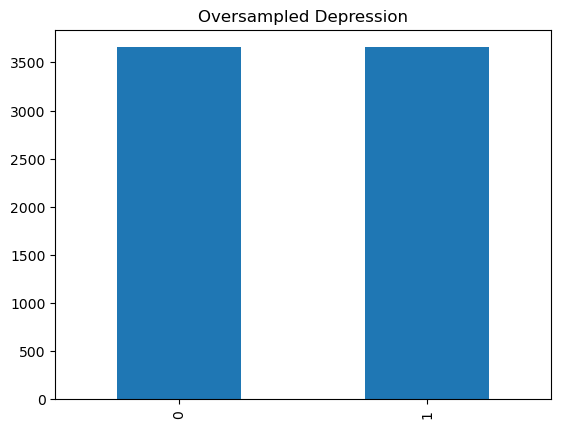

In [18]:
depression_os.value_counts().plot(kind='bar')
plt.title('Oversampled Depression')
plt.show()


# 1. Important Features (Chi-Squares)

In [19]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
k = 20  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_depression, depression_os)

In [21]:
selected_feature_indices_dep = selector.get_support(indices=True)

In [22]:
selected_feature_names_dep = X.columns[selected_feature_indices_dep]

In [23]:
chi2_scores = selector.scores_[selected_feature_indices_dep]

In [24]:
feature_importance_dep_chi2 = pd.DataFrame({'Depressive Features': selected_feature_names_dep, 'Chi2 Score': chi2_scores})
feature_importance_dep_chi2 = feature_importance_dep_chi2.sort_values(by='Chi2 Score', ascending=False)

# Print the feature importance results
feature_importance_dep_chi2.head(20)

,Depressive Features,Chi2 Score
3,Year of university,186.760743
5,Parental home,167.546008
18,Drinker (3 levels),150.204161
1,Gender,109.475530
19,Binge drinking,103.938144
16,Abnormal urinalysis,93.968944
9,Additional income,88.360000
15,Urinalysis leukocyturia),88.007407
7,At least one parent unemployed,72.495575
11,Overweight and obesity,69.658359


# 2. Important Features (Random Forest)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_depression, depression_os)

feature_importances_dep_RF = pd.DataFrame({'Depression Features': X_depression.columns, 'Importance': rf.feature_importances_})
feature_importances_dep_RF = feature_importances_dep_RF.sort_values(by='Importance', ascending=False)

# Print the feature importance results
print(feature_importances_dep_RF.head(20))

                 Depression Features  Importance
2                                 PP    0.110772
1                                MAP    0.098514
3                   Heart rate (bpm)    0.079943
0                                BMI    0.079904
7                     Field of study    0.045211
15                     Parental home    0.038891
4                     Age (4 levels)    0.034903
53                Drinker (3 levels)    0.033337
20            Mode of transportation    0.027146
11            Professional objective    0.023147
5                             Gender    0.021966
32       Physical activity(3 levels)    0.021229
51       Cigarette smoker (5 levels)    0.020610
13  Satisfied with living conditions    0.019310
29                  Eating junk food    0.018328
52       Cigarette smoker (3 levels)    0.017656
50        Control examination needed    0.016887
22                             Grant    0.016872
16            Having only one parent    0.016860
24          Public h

# 3. Important Feature (ANOVA )

In [27]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np

# Perform ANOVA for all features
anova_results = {}
for feature in X_depression.columns:
    f_statistic, p_value = f_oneway(*[X_depression[depression_os == group][feature] for group in np.unique(depression_os)])
    anova_results[feature] = {'F-Statistic': f_statistic, 'P-value': p_value}

# Sort the features based on F-statistic in descending order
sorted_features = sorted(anova_results.items(), key=lambda x: x[1]['F-Statistic'], reverse=True)

# Select the top 20 features with non-NaN values
top_20_features = []
for feature, values in sorted_features:
    if not np.isnan(values['F-Statistic']) and not np.isnan(values['P-value']):
        top_20_features.append(feature)
        if len(top_20_features) == 20:
            break

# Create a dataframe to store the top 20 features and their ANOVA results
top_20_df = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-value'])
for feature in top_20_features:
    f_statistic = anova_results[feature]['F-Statistic']
    p_value = anova_results[feature]['P-value']
    top_20_df = top_20_df.append({'Feature': feature, 'F-Statistic': f_statistic, 'P-value': p_value}, ignore_index=True)

# Print the top 20 features and their corresponding F-statistic and p-value
print(top_20_df)

                             Feature  F-Statistic       P-value
0                      Parental home   382.803228  3.972891e-83
1                 Drinker (3 levels)   351.547895  1.199597e-76
2   Satisfied with living conditions   238.973624  4.525290e-53
3                             Gender   173.686787  3.237134e-39
4                 Year of university   136.047470  3.674185e-31
5          Private health insurance    131.158310  4.125371e-30
6                     Binge drinking   108.323515  3.421883e-25
7             Professional objective   105.222164  1.600014e-24
8                Abnormal urinalysis    97.337390  8.114229e-23
9                  Additional income    92.291017  1.005084e-21
10          Urinalysis leukocyturia)    90.751138  2.167608e-21
11                    Age (4 levels)    81.712956  1.984859e-19
12            Overweight and obesity    81.091719  2.708598e-19
13            Having only one parent    79.722096  5.376388e-19
14    At least one parent unemployed    

# MODELLING With Chi Square Features

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select the top 20 features from the 'feature_importance_Chi2' dataframe
top_20_features = feature_importance_dep_chi2.head(20)['Depressive Features'].tolist()

# Create the feature matrix 'X' using the top 20 features
X_dep_chi2 = X_depression[top_20_features]

# Create the target variable 'y'
y_dep_chi2 = depression_os

# Split the data into training and testing sets
X_train_dep_chi2, X_test_dep_chi2, y_train_dep_chi2, y_test_dep_chi2 = train_test_split(X_dep_chi2, y_dep_chi2, test_size=0.3, random_state=42)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_dep_chi2 = label_encoder.fit_transform(y_train_dep_chi2)

# Transform the test set
y_test_encoded_dep_chi2 = label_encoder.transform(y_test_dep_chi2)


In [30]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_dep_chi2, y_train_encoded_dep_chi2)

RandomForestClassifier()

In [31]:
# Predict on the test data
y_pred_dep_chi2 = rf_classifier.predict(X_test_dep_chi2)

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Calculate precision score
precision = precision_score(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Calculate F1 score
f1 = f1_score(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Print the results
print("AUC score for Depression:", auc_score)
print("Precision for Depression:", precision)
print("Accuracy for Depression:", accuracy)
print("F1 score for Depression:", f1)

AUC score for Depression: 0.7695643863847893
Precision for Depression: 0.7514693534844669
Accuracy for Depression: 0.7698268003646308
F1 score for Depression: 0.7799564270152505


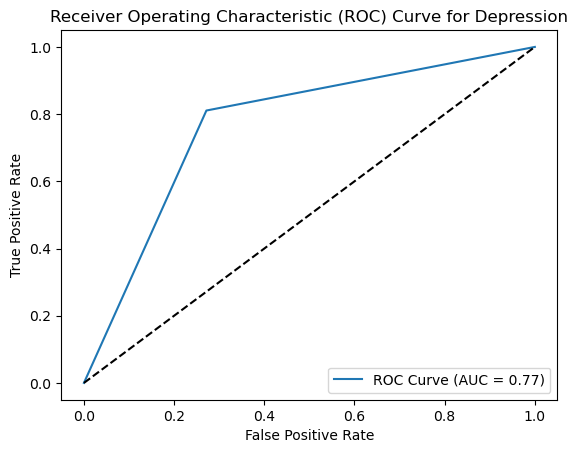

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_dep_chi2, y_pred_dep_chi2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Depression')
plt.legend(loc='lower right')
plt.show()

# MODELING With RF Features

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Select the top 20 features from the 'feature_importance_Chi2' dataframe
top_20_features = feature_importances_dep_RF.head(20)['Depression Features'].tolist()

# Create the feature matrix 'X' using the top 20 features
X_dep_RF = X_depression[top_20_features]

# Create the target variable 'y'
y_dep_RF = depression_os

# Split the data into training and testing sets
X_train_dep_RF, X_test_dep_RF, y_train_dep_RF, y_test_dep_RF = train_test_split(X_dep_RF, y_dep_RF, test_size=0.3, random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_dep_RF = label_encoder.fit_transform(y_train_dep_RF)

# Transform the test set
y_test_encoded_dep_RF = label_encoder.transform(y_test_dep_RF)

### 1. Random Forest

In [36]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_dep_RF, y_train_encoded_dep_RF)

RandomForestClassifier()

In [37]:
# Predict on the test data
y_pred_dep_RF = rf_classifier.predict(X_test_dep_RF)

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_dep_RF, y_pred_dep_RF)

# Calculate precision score
precision = precision_score(y_test_encoded_dep_RF, y_pred_dep_RF)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_dep_RF, y_pred_dep_RF)

# Calculate F1 score
f1 = f1_score(y_test_encoded_dep_RF, y_pred_dep_RF)

recall = recall_score(y_test_encoded_dep_RF, y_pred_dep_RF)

# Print the results
print("AUC score for Depression:", auc_score)
print("Precision for Depression:", precision)
print("Accuracy for Depression:", accuracy)
print("F1 score for Depression:", f1)
print("Recall score for Depression:",recall)

AUC score for Depression: 0.9035317776891371
Precision for Depression: 0.9255725190839694
Accuracy for Depression: 0.9033728350045579
F1 score for Depression: 0.9014869888475837
Recall score for Depression: 0.8786231884057971


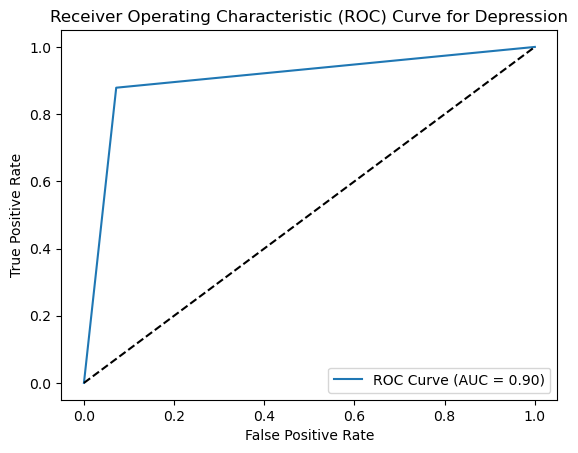

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_dep_RF, y_pred_dep_RF)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_dep_RF, y_pred_dep_RF)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Depression')
plt.legend(loc='lower right')
plt.show()

### 2. logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_dep_RF, X_test_dep_RF, y_train_dep_RF, y_test_dep_RF = train_test_split(
    X_dep_RF, y_dep_RF, test_size=0.3, random_state=42
)

# Create a Logistic Regression model with L2 normalization
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Train the model
logreg.fit(X_train_dep_RF, y_train_encoded_dep_RF)

# Make predictions on the test set
y_pred = logreg.predict(X_test_dep_RF)

# Calculate evaluation metrics
f1 = f1_score(y_test_encoded_dep_RF, y_pred)
accuracy = accuracy_score(y_test_encoded_dep_RF, y_pred)
precision = precision_score(y_test_encoded_dep_RF, y_pred)
recall = recall_score(y_test_encoded_dep_RF, y_pred)
auc = roc_auc_score(y_test_encoded_dep_RF, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc)


Evaluation Metrics:
F1 Score: 0.6773749426342359
Accuracy: 0.6795806745670009
Precision: 0.6865116279069767
Recall: 0.6684782608695652
AUC Score: 0.6796519744714798


### 3. SVM

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_dep_RF, X_test_dep_RF, y_train_dep_RF, y_test_dep_RF = train_test_split(
    X_dep_RF, y_dep_RF, test_size=0.3, random_state=42
)

# Create an SVM model with a polynomial kernel
svm = SVC(kernel='poly', degree=3, random_state=42)

# Train the model
svm.fit(X_train_dep_RF, y_train_encoded_dep_RF)

# Make predictions on the test set
y_pred = svm.predict(X_test_dep_RF)

# Calculate evaluation metrics
f1 = f1_score(y_test_encoded_dep_RF, y_pred)
accuracy = accuracy_score(y_test_encoded_dep_RF, y_pred)
precision = precision_score(y_test_encoded_dep_RF, y_pred)
recall = recall_score(y_test_encoded_dep_RF, y_pred)
auc = roc_auc_score(y_test_encoded_dep_RF, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc)


Evaluation Metrics:
F1 Score: 0.7524499360886238
Accuracy: 0.735186873290793
Precision: 0.7103781174577635
Recall: 0.7998188405797102
AUC Score: 0.734771805610956


### 4. KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_dep_RF, X_test_dep_RF, y_train_dep_RF, y_test_dep_RF = train_test_split(
    X_dep_RF, y_dep_RF, test_size=0.3, random_state=42
)

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_dep_RF, y_train_encoded_dep_RF)

# Make predictions on the test set
y_pred = knn.predict(X_test_dep_RF)

# Calculate evaluation metrics
f1 = f1_score(y_test_encoded_dep_RF, y_pred)
accuracy = accuracy_score(y_test_encoded_dep_RF, y_pred)
precision = precision_score(y_test_encoded_dep_RF, y_pred)
recall = recall_score(y_test_encoded_dep_RF, y_pred)
auc = roc_auc_score(y_test_encoded_dep_RF, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc)


Evaluation Metrics:
F1 Score: 0.8145193458316713
Accuracy: 0.7880583409298085
Precision: 0.7277263007840342
Recall: 0.9248188405797102
AUC Score: 0.7871800624916899


# MODELLING With ANOVA Features

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select the top 20 features
selected_features = top_20_df['Feature'].tolist()

# Create the feature matrix X and target variable y
X = X_depression[selected_features]
y = depression_os

# Split the data into training and testing sets
X_train_dep_ANOVA, X_test_dep_ANOVA, y_train_dep_ANOVA, y_test_dep_ANOVA = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training set
y_train_encoded_dep_ANOVA = label_encoder.fit_transform(y_train_dep_ANOVA)

# Transform the test set
y_test_encoded_dep_ANOVA = label_encoder.transform(y_test_dep_ANOVA)

In [45]:
# Create an instance of RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train_dep_ANOVA, y_train_encoded_dep_ANOVA)

RandomForestClassifier(random_state=42)

In [46]:
# Predict on the test data
y_pred_dep_ANOVA = rf_classifier.predict(X_test_dep_ANOVA)

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, accuracy_score, f1_score

# Calculate AUC score
auc_score = roc_auc_score(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Calculate precision score
precision = precision_score(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Calculate F1 score
f1 = f1_score(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Print the results
print("AUC score for Anxiety with ANOVA:", auc_score)
print("Precision for Anxiety with ANOVA:", precision)
print("Accuracy for Anxiety with ANOVA:", accuracy)
print("F1 score for Anxiety with ANOVA:", f1)

AUC score for Anxiety with ANOVA: 0.7622947413907726
Precision for Anxiety with ANOVA: 0.746407438715131
Accuracy for Anxiety with ANOVA: 0.7625341841385597
F1 score for Anxiety with ANOVA: 0.7721906427634455


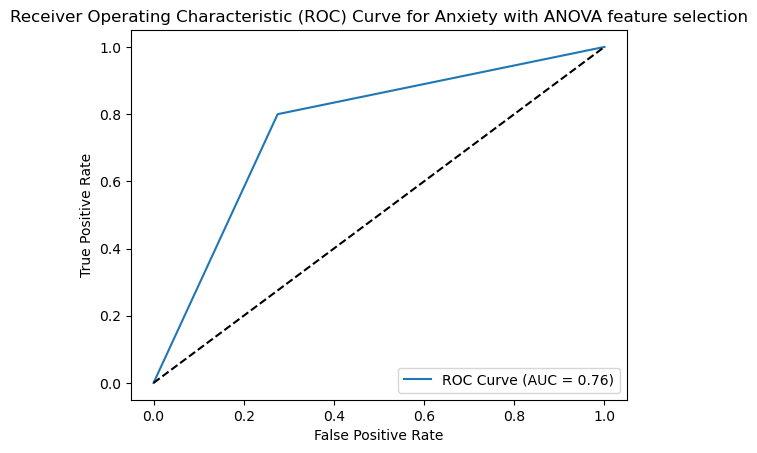

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Compute the AUC score
auc_score = roc_auc_score(y_test_encoded_dep_ANOVA, y_pred_dep_ANOVA)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Add the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Anxiety with ANOVA feature selection')
plt.legend(loc='lower right')
plt.show()